In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loantrain = pd.read_csv("loan-train.csv")

In [3]:
loantrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loantest = pd.read_csv("loan-test.csv")

In [5]:
loantest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
loantest.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [7]:
#making copy of original data
original_train = loantrain.copy()
original_test = loantest.copy()

In [8]:
loantrain.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
loantest.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
loantrain.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
loantrain.shape

(614, 13)

In [12]:
loantrain.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
loantest.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


<AxesSubplot:>

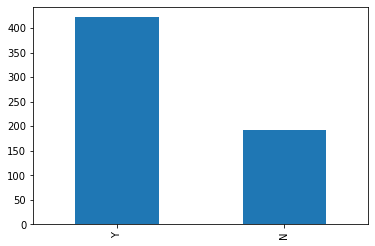

In [14]:
loantrain["Loan_Status"].value_counts().plot.bar()

In [15]:
#68.72% of loan were approved
loantrain["Loan_Status"].value_counts(normalize=True) 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [16]:
pd.crosstab(loantrain['Credit_History'], loantrain['Loan_Status'], margins =True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


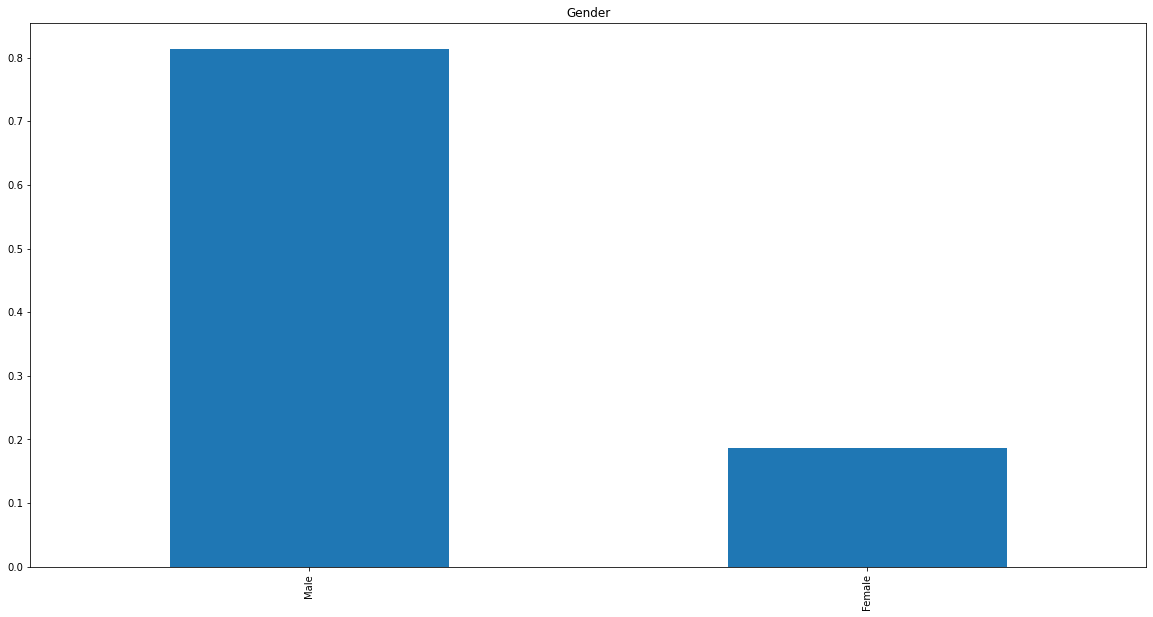

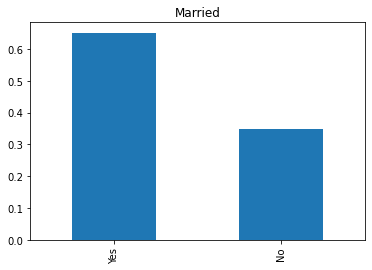

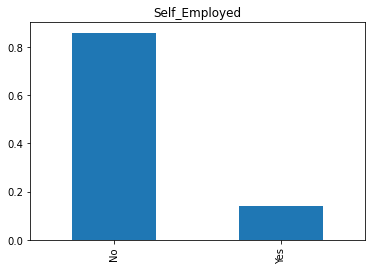

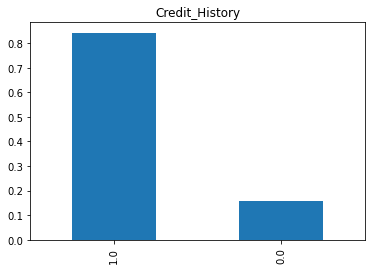

In [17]:
#Plotting independent variable
loantrain["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")
plt.show()
loantrain["Married"].value_counts(normalize=True).plot.bar(title="Married")
plt.show()
loantrain["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self_Employed")
plt.show()
loantrain["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History")
plt.show()

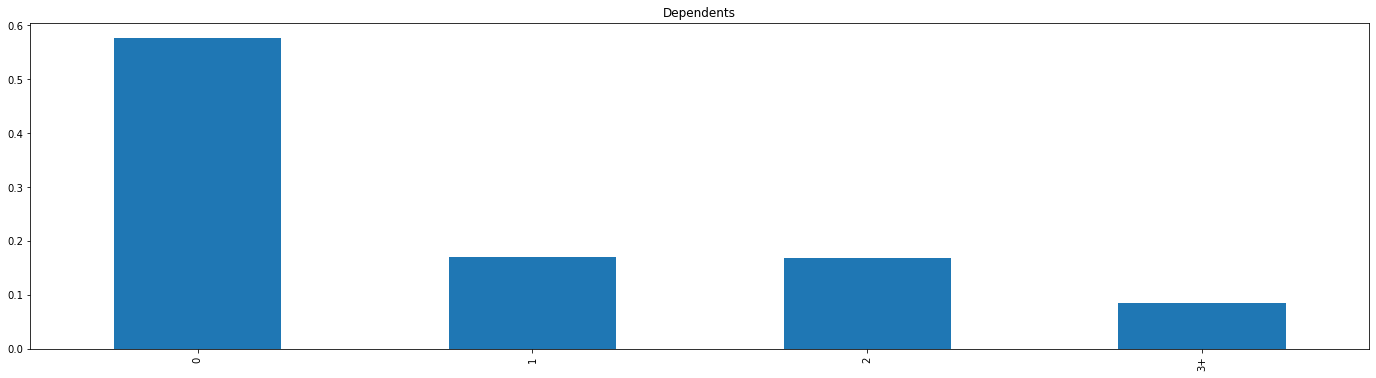

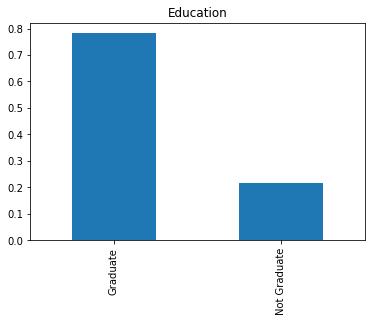

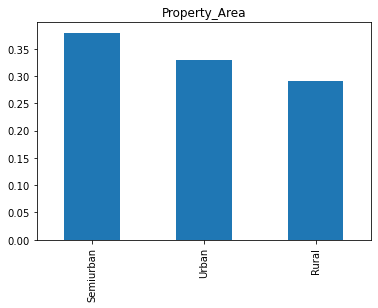

In [18]:
loantrain["Dependents"].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Dependents")
plt.show()
loantrain["Education"].value_counts(normalize=True).plot.bar(title="Education")
plt.show()
loantrain["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

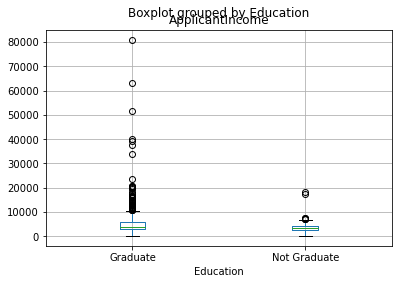

In [19]:
loantrain.boxplot(column = "ApplicantIncome", by = "Education")

<AxesSubplot:>

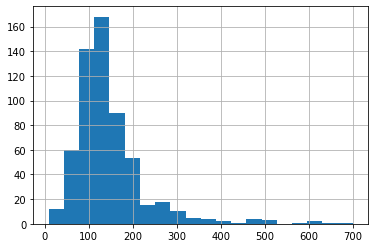

In [20]:
loantrain['LoanAmount'].hist(bins=20)


<AxesSubplot:>

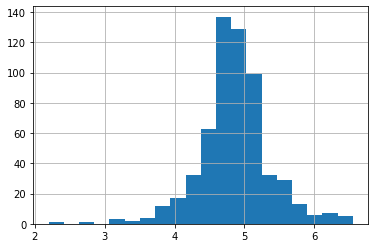

In [21]:
loantrain["LoanAmount_log"]= np.log(loantrain["LoanAmount"])
loantrain["LoanAmount_log"].hist(bins=20)

<AxesSubplot:>

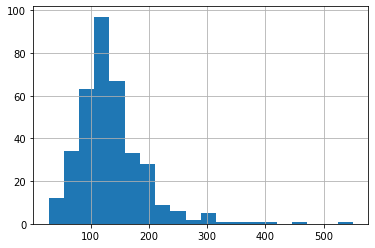

In [22]:
loantest['LoanAmount'].hist(bins=20)

<AxesSubplot:>

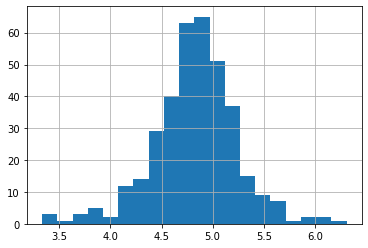

In [23]:
#normalizing the loantest data for loanamount since it some exponential value
loantest["LoanAmount_log"]= np.log(loantest["LoanAmount"])
loantest["LoanAmount_log"].hist(bins=20)

In [24]:
#Dealing with missing value
loantrain.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [25]:
#Using mode to fill the catagorical variable
loantrain["Gender"].fillna(loantrain["Gender"].mode()[0], inplace=True)
loantrain["Married"].fillna(loantrain["Married"].mode()[0], inplace=True)
loantrain["Dependents"].fillna(loantrain["Dependents"].mode()[0], inplace=True)
loantrain["Loan_Amount_Term"].fillna(loantrain["Loan_Amount_Term"].mode()[0], inplace=True)
loantrain["Self_Employed"].fillna(loantrain["Self_Employed"].mode()[0], inplace=True)
loantrain["Credit_History"].fillna(loantrain["Credit_History"].mode()[0], inplace=True)

In [26]:
loantrain.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [27]:
#Using mean to fill the numerical variable
loantrain.LoanAmount = loantrain.LoanAmount.fillna(loantrain.LoanAmount.mean())
loantrain.LoanAmount_log = loantrain.LoanAmount_log.fillna(loantrain.LoanAmount_log.mean())


In [28]:
loantrain.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [29]:
#Filling missing value for test data too
loantest.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
LoanAmount_log        5
dtype: int64

In [30]:
#filling catagorical variable for test data
loantest["Gender"].fillna(loantest["Gender"].mode()[0], inplace=True)
loantest["Dependents"].fillna(loantest["Dependents"].mode()[0], inplace=True)
loantest["Self_Employed"].fillna(loantest["Self_Employed"].mode()[0], inplace=True)
loantest["Loan_Amount_Term"].fillna(loantest["Loan_Amount_Term"].mode()[0], inplace=True)
loantest["Credit_History"].fillna(loantest["Credit_History"].mode()[0], inplace=True)

In [31]:
#Using mean to fill the numerical variable
loantest.LoanAmount = loantrain.LoanAmount.fillna(loantest.LoanAmount.mean())
loantest.LoanAmount_log = loantrain.LoanAmount_log.fillna(loantest.LoanAmount_log.mean())

In [32]:
loantest.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [33]:
#making new column for total income by combining applicant and co-applicant income
loantrain["TotalIncome"] = loantrain["ApplicantIncome"] + loantrain["CoapplicantIncome"]
loantest["TotalIncome"] = loantest["ApplicantIncome"] + loantest["CoapplicantIncome"]

<AxesSubplot:>

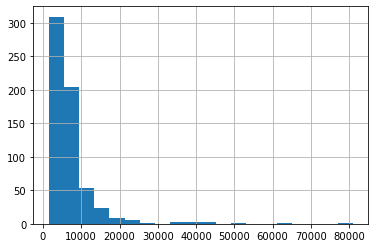

In [34]:
loantrain["TotalIncome"].hist(bins=20)

<AxesSubplot:>

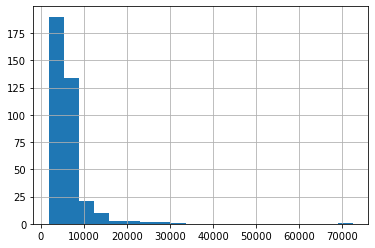

In [35]:
loantest["TotalIncome"].hist(bins=20)

In [36]:
#normalizing TotalIncome
loantrain["TotalIncome_log"] =np.log(loantrain["TotalIncome"])
loantest["TotalIncome_log"] =np.log(loantest["TotalIncome"])

<AxesSubplot:>

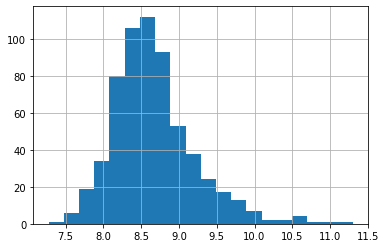

In [37]:
loantrain["TotalIncome_log"].hist(bins=20)

<AxesSubplot:>

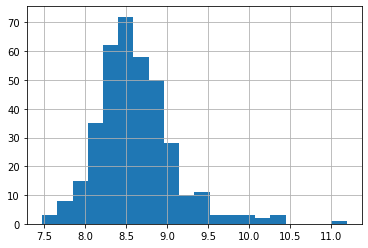

In [38]:
loantest["TotalIncome_log"].hist(bins=20)

# finding relation between target variable and catagorical independent variable

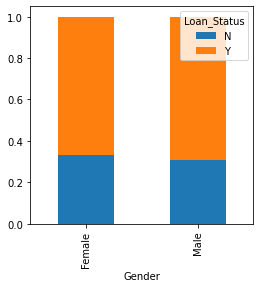

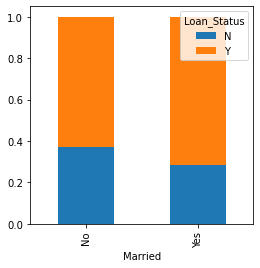

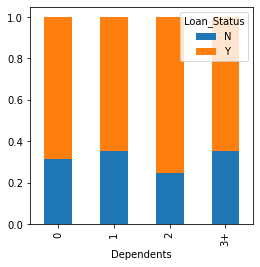

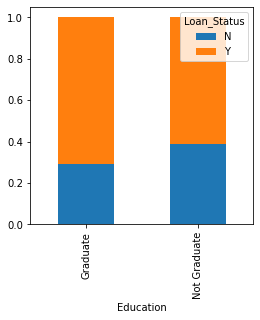

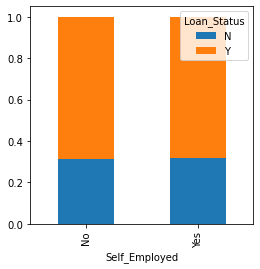

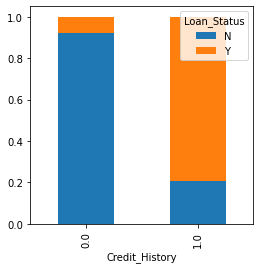

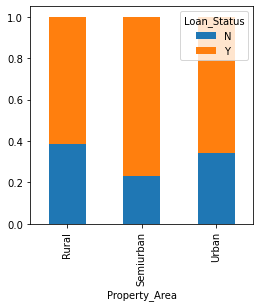

In [39]:
Gender=pd.crosstab(loantrain["Gender"],loantrain["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Married=pd.crosstab(loantrain["Married"],loantrain["Loan_Status"])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Dependents=pd.crosstab(loantrain["Dependents"],loantrain["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Education=pd.crosstab(loantrain["Education"],loantrain["Loan_Status"])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Self_Employed=pd.crosstab(loantrain["Self_Employed"],loantrain["Loan_Status"])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Credit_History=pd.crosstab(loantrain["Credit_History"],loantrain["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Property_Area=pd.crosstab(loantrain["Property_Area"],loantrain["Loan_Status"])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()


<AxesSubplot:>

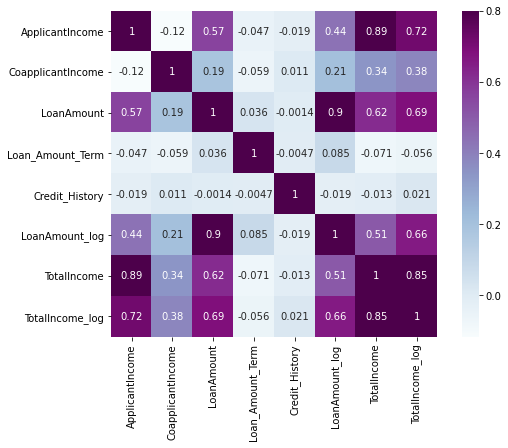

In [40]:
matrix = loantrain.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)


In [41]:
loantrain["Dependents"].replace("3+", 3,inplace=True)
loantest["Dependents"].replace("3+", 3,inplace=True)
loantrain["Loan_Status"].replace("N", 0,inplace=True)
loantrain["Loan_Status"].replace("Y", 1,inplace=True)

In [42]:
loantrain["Dependents"] = pd.to_numeric(loantrain["Dependents"], downcast="float")
loantest["Dependents"] = pd.to_numeric(loantest["Dependents"], downcast="float")

<AxesSubplot:>

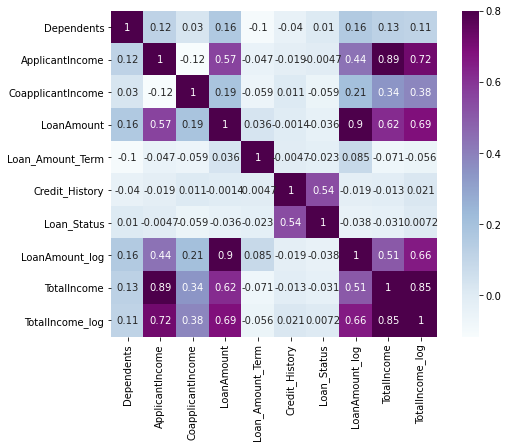

In [43]:
#Plotting the heat map again
matrix = loantrain.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

# Model Building : Part I

In [44]:
loantrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,4.948760,6000.0,8.699515


In [45]:
#droping loan_id since it does not effect loan status
loantrain = loantrain.drop("Loan_ID",axis=1)
loantest = loantest.drop("Loan_ID",axis=1)

In [46]:
#droping target variable from training database for scikit-learn
X = loantrain.drop("Loan_Status",1)
Y = loantrain.Loan_Status

In [47]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,4.857444,5849.0,8.674026
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,4.852030,6091.0,8.714568
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,4.189655,3000.0,8.006368
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4.787492,4941.0,8.505323
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,4.262680,2900.0,7.972466
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,3.688879,4106.0,8.320205
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,5.533389,8312.0,9.025456
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,5.231109,7583.0,8.933664


In [48]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [49]:
#making dummy variable for catagorical variable so the catagorical variable can be turned into series of 0 and 1
X = pd.get_dummies(X)
loantrain=pd.get_dummies(loantrain)
loantest=pd.get_dummies(loantest)

In [50]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,146.412162,360.0,1.0,4.857444,5849.0,8.674026,0,1,1,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,4.852030,6091.0,8.714568,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,4.189655,3000.0,8.006368,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,4.787492,4941.0,8.505323,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.000000,360.0,1.0,4.948760,6000.0,8.699515,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.000000,360.0,1.0,4.262680,2900.0,7.972466,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40.000000,180.0,1.0,3.688879,4106.0,8.320205,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253.000000,360.0,1.0,5.533389,8312.0,9.025456,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187.000000,360.0,1.0,5.231109,7583.0,8.933664,0,1,0,1,1,0,1,0,0,0,1


In [51]:
#Dividing our train data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train)
LogisticRegression()

C:\Users\theam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
pred_cv = model.predict(X_test)
accuracy_score(Y_test,pred_cv)

0.7783783783783784

In [54]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [55]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
DTClassifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
y_pred= DTClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [57]:
from sklearn import metrics
print("The acccuracy of decision tree is: ", metrics.accuracy_score(y_pred,Y_test))

The acccuracy of decision tree is:  0.6594594594594595


In [58]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, Y_train)

GaussianNB()

In [59]:
y_pred = NBClassifier.predict(X_test)

In [60]:
print("The accuracyt of Naive Bayes is:", metrics.accuracy_score(y_pred,Y_test))

The accuracyt of Naive Bayes is: 0.8216216216216217


In [61]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# making prediction of test database 

In [62]:
from sklearn.model_selection import StratifiedKFold

In [63]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5)
for loantrain_index,loantest_index in kf.split(X,Y):
 print ("\n{} of kfold {} ".format(i,kf.n_splits))
 xtr,xvl = X.loc[loantrain_index],X.loc[loantest_index]
 ytr,yvl = Y[loantrain_index],Y[loantest_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ("accuracy_score",score)
 i+=1
 pred_test = model.predict(loantest)
 pred = model.predict_proba(xvl)[:,1]
print ("\n Mean Validation Accuracy",mean/(i-1))


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 


C:\Users\theam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\theam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

accuracy_score 0.7235772357723578

3 of kfold 5 
accuracy_score 0.7886178861788617

4 of kfold 5 
accuracy_score 0.8292682926829268

5 of kfold 5 
accuracy_score 0.7704918032786885

 Mean Validation Accuracy 0.7849926695988272


C:\Users\theam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\theam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

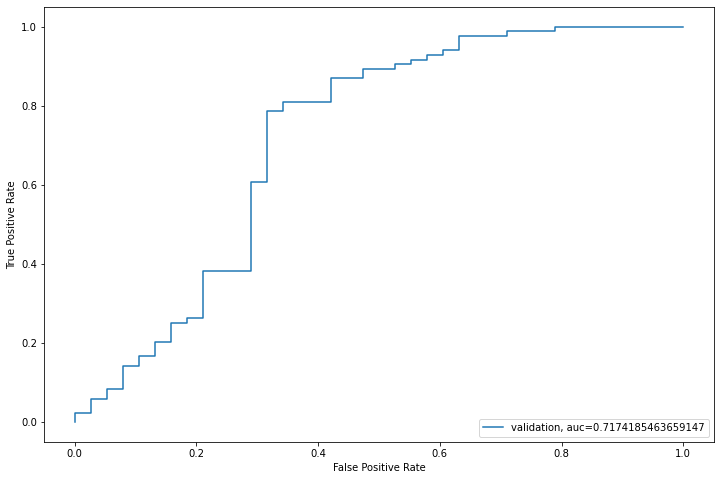

In [64]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()